In [3]:
from  google.colab import files
uploaded = files.upload()

Saving GOOGL.csv to GOOGL.csv


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
# Load the data from the CSV file
df = pd.read_csv("GOOGL.csv")

In [6]:
# View the first few rows of the data
print(df.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602


In [7]:
# Calculate descriptive statistics
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  4431.000000  4431.000000  4431.000000  4431.000000  4431.000000   
mean    693.087345   699.735595   686.078751   693.097367   693.097367   
std     645.118799   651.331215   638.579488   645.187806   645.187806   
min      49.644646    50.920921    48.028027    50.055054    50.055054   
25%     248.558563   250.853355   245.813309   248.415916   248.415916   
50%     434.924927   437.887878   432.687683   435.330322   435.330322   
75%    1007.364990  1020.649994   997.274994  1007.790008  1007.790008   
max    3025.000000  3030.929932  2977.979980  2996.770020  2996.770020   

             Volume  
count  4.431000e+03  
mean   6.444992e+06  
std    7.690351e+06  
min    4.656000e+05  
25%    1.695600e+06  
50%    3.778418e+06  
75%    8.002390e+06  
max    8.215117e+07  


In [8]:
# Calculate correlation coefficients
corr = df.corr()
print(corr)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999915  0.999902  0.999808   0.999808 -0.453884
High       0.999915  1.000000  0.999877  0.999903   0.999903 -0.452855
Low        0.999902  0.999877  1.000000  0.999914   0.999914 -0.455447
Close      0.999808  0.999903  0.999914  1.000000   1.000000 -0.454252
Adj Close  0.999808  0.999903  0.999914  1.000000   1.000000 -0.454252
Volume    -0.453884 -0.452855 -0.455447 -0.454252  -0.454252  1.000000


<ipython-input-8-f905e842ee1d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<ipython-input-9-58a8a9083de7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999915  0.999902  0.999808   0.999808 -0.453884
High       0.999915  1.000000  0.999877  0.999903   0.999903 -0.452855
Low        0.999902  0.999877  1.000000  0.999914   0.999914 -0.455447
Close      0.999808  0.999903  0.999914  1.000000   1.000000 -0.454252
Adj Close  0.999808  0.999903  0.999914  1.000000   1.000000 -0.454252
Volume    -0.453884 -0.452855 -0.455447 -0.454252  -0.454252  1.000000


<Axes: >

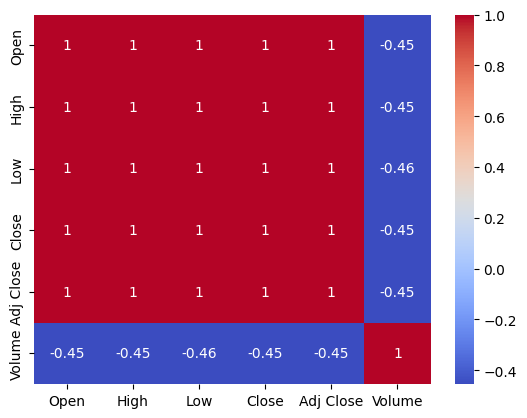

In [9]:
#correlation analysis
import seaborn as sns
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot = True, cmap= 'coolwarm')

In [10]:
# Split the data into training and test sets
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# Evaluate the model on the test set
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9999170390386292


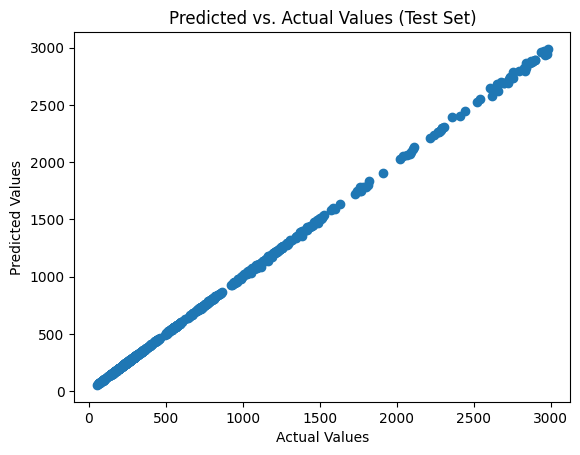

In [14]:
# Visualize the predicted vs. actual values for test set
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Test Set)")
plt.show()

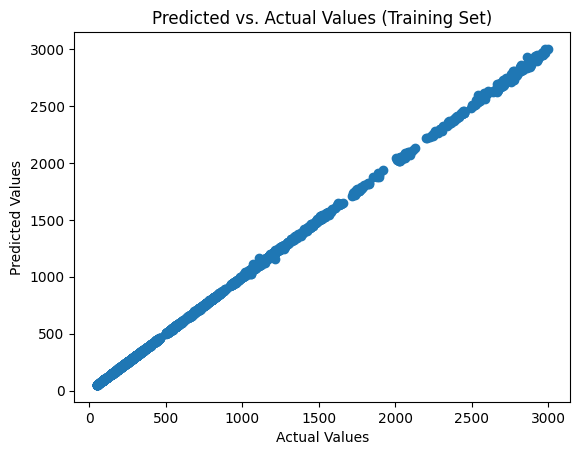

In [15]:
# Visualize the predicted vs. actual values for training set
y_train_pred = regressor.predict(X_train)
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Training Set)")
plt.show()

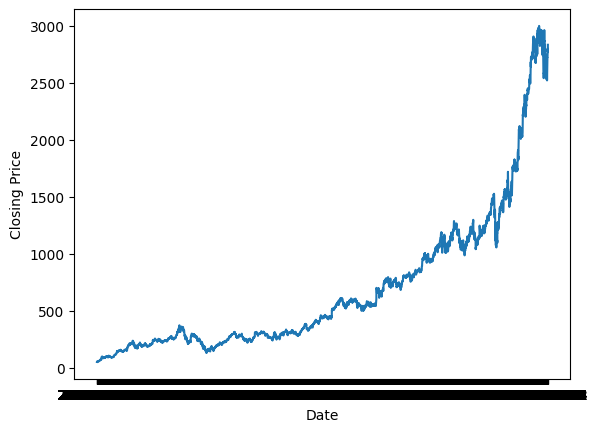

In [18]:
# Line plot of closing price over time
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [16]:
import scipy.stats as stats
# hypothesis test
result = stats.ttest_ind(df['High'], df['Low'])
print(result.pvalue)

0.318969798833348


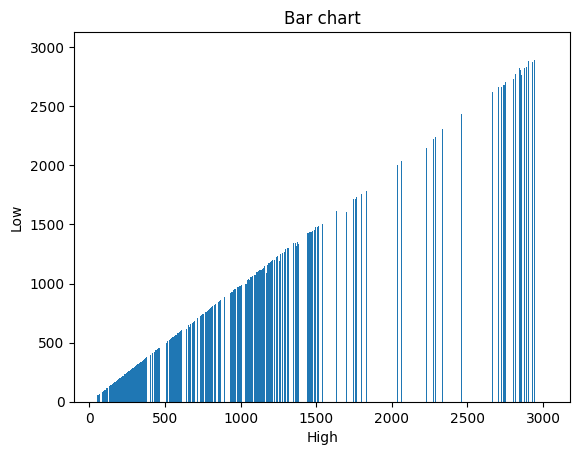

In [17]:
plt.bar(df['High'], df['Low'])
plt.title("Bar chart")
plt.xlabel('High')
plt.ylabel('Low')
plt.show()